<a href="https://colab.research.google.com/github/artyomsol23/google_colab/blob/main/my_homework_3_week%5Breu_ml_school%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>**ML School by REU Data Scinece Club**</center>

---
## <center> Неделя №3 </center>




На этой неделе вам предстоит обработать данные о зарплатах. Данные очень похожи на настоящие, поэтому вам будет в каких-то моментах неприятно) В них очень много мусора и поэтому понадобиться потратить время на обработку. DS - специалист работает с чем-то подобным крайне часто.
Если столкнетесь с проблемой, пишите в чат, где вам помогут авторы и остальные участники, решать проблемы в коллективе - легче. Удачи!

Про данные можно прочитать [тут](https://oscarbaruffa.com/messy/)

Импортируем библиотеки которые могут вам понадобиться, а затем загрузим данные

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

Теперь давайте скачаем нужные данные


In [28]:
!git clone https://github.com/MeinRespect/REU-Ml-SCHOOL.git

fatal: destination path 'REU-Ml-SCHOOL' already exists and is not an empty directory.


In [8]:
df = pd.read_csv('/content/REU-Ml-SCHOOL/right_data.csv')
df.sample(5)

FileNotFoundError: [Errno 2] No such file or directory: '/content/REU-Ml-SCHOOL/right_data.csv'

Как можно заметить названия колонок оставляют желать лучшего, давайте это исправим

In [32]:
df.columns = ['Timestamp', 'Age','Industry', 'Job', 'Job context', 'Salary',
              'Amount of monetary compensation', 'Currency',
              'Currency special', 'Income context', 'Country',
              'State in USA', 'City', 'Work expirince all',
              'Work expirince in current field', 'Education', 'Gender', 'Race'
              ]
df.sample(40)

,Timestamp,Age,Industry,Job,Job context,Salary,Amount of monetary compensation,Currency,Currency special,Income context,Country,State in USA,City,Work expirince all,Work expirince in current field,Education,Gender,Race
26162,5/14/2021 10:50:43,25-34,Government and Public Administration,Senior User Researcher & Service Designer,I work on a product team for a software compan...,98000,5000.0,USD,NaN,"I work remotely, company is based in the D.C. ...",United States,California,San Diego,5-7 years,5-7 years,Master's degree,Woman,White
22650,4/30/2021 22:07:23,25-34,Sales,Inbound Sales,Call centre work,43313,1200.0,AUD/NZD,NaN,NaN,Australia,NaN,Brisbane,5-7 years,1 year or less,NaN,Woman,White
25661,5/7/2021 12:13:39,25-34,Computing or Tech,Data Protection Manager,NaN,80000,15000.0,GBP,NaN,NaN,UK,NaN,London,8 - 10 years,2 - 4 years,Master's degree,NaN,White
5555,4/27/2021 13:15:53,45-54,Education (Higher Education),Systems Coordinator,Library,"91,000",0.0,USD,NaN,NaN,United States,New Jersey,xxx,21 - 30 years,21 - 30 years,Master's degree,Woman,White
27134,10/26/2021 12:46:54,35-44,IT,Technical Writer,IT Pre-Sales,11000,0.0,USD,NaN,NaN,Pakistan,NaN,Karachi,8 - 10 years,8 - 10 years,College degree,Woman,Another option not listed here or prefer not t...
4266,4/27/2021 12:29:27,25-34,Health care,Revenue Cycle Sr. Associate,I work at a medical billing company,"85,700",6000.0,USD,NaN,NaN,USA,Massachusetts,Boston,11 - 20 years,11 - 20 years,College degree,Woman,White
2168,4/27/2021 11:39:27,25-34,Health care,Project Manager,Sometimes wear the hat of an operations manager,"56,000",1000.0,USD,NaN,NaN,US,Pennsylvania,"Abington, PA",5-7 years,2 - 4 years,Master's degree,Woman,Asian or Asian American
20921,4/29/2021 18:32:48,35-44,Computing or Tech,Software Developer,NaN,39000,NaN,GBP,NaN,NaN,United Kingdom,NaN,Newcastle upon Tyne,11 - 20 years,11 - 20 years,College degree,Man,White
25346,5/6/2021 13:12:24,55-64,Biotech/Pharma,Enterprise Content Manager,NaN,124000,10000.0,USD,NaN,NaN,United States,Massachusetts,Cambridge,21 - 30 years,21 - 30 years,College degree,Woman,White
20892,4/29/2021 18:14:06,45-54,Computing or Tech,Principal Software Engineer,Labor grade 6 out of 8,142000,15000.0,USD,NaN,NaN,United States,Iowa,Cedar Rapids,21 - 30 years,21 - 30 years,College degree,Man,White


# **Задание 1. Чистка данных (6 баллов)**

## Этап 1.1
Теперь вам нужно привести колонки Salary и Amount of monetary compensation к единой шкале измерения - доллару.
Для этого вы можете использовать два способа:

1.   Простой. Вы берете сегодняшнюю дату и приводите все основные валюты из колонки Currency к доллару, а те строчки, где значение колонки равно "Other", вы удаляете.
2.   Сложный. Вы смотрите на значение Timestamp и актуальный для этой даты курс. Если в Currency встречается значение "Other", то вы пытаетесь восстановить валюту по колонке Currency Special. Тут вам может пригодится библиотека [forex](https://forex-python.readthedocs.io/en/latest/usage.html). Внимание! Библиотека часто не работает и выдает различные ошибки. Вы можете попробовать найти альтернативу или придмать свой интересный способ.

За оба решения вы получите **одинаковое количество баллов**, но учитывайте, что в простом вы теряете много полезной информации.

In [9]:
# Ваш код тут
df = df[(df['Salary'] != 'Other') & (df['Amount of monetary compensation'] != 'Other')]

exchange_rates = {
    'USD': 1.0,
    'BRL': 5.56265,
    'EUR': 0.853818,
    'GBP': 0.744821,
    'INR': 85.9509,
    'JPY': 148.05,
}

def convert_to_usd(value, currency):
    if pd.isna(value) or str(value).strip() == '':
        return None
    try:
        value_cleaned = float(str(value).replace(',', '').strip())
        if currency in exchange_rates:
            return value_cleaned / exchange_rates[currency]
        else:
            return value_cleaned
    except:
        return None

df['Salary'] = df.apply(lambda row: convert_to_usd(row['Salary'], row['Currency']), axis=1)
df['Amount of monetary compensation'] = df.apply(lambda row: convert_to_usd(row['Amount of monetary compensation'], row['Currency']), axis=1)
df.sample(5)

NameError: name 'df' is not defined

После стандартизации к доллару удалите эти две колонки: Currency и Currency Special


In [36]:
# Ваш код тут
df = df.drop(['Currency', 'Currency special'], axis=1)
df.sample(5)

,Timestamp,Age,Industry,Job,Job context,Salary,Amount of monetary compensation,Income context,Country,State in USA,City,Work expirince all,Work expirince in current field,Education,Gender,Race
8364,4/27/2021 15:56:06,25-34,Education (Higher Education),Academic Advisor,NaN,40000.0,NaN,NaN,US,Texas,Austin,5-7 years,5-7 years,Master's degree,Woman,White
5806,4/27/2021 13:24:20,35-44,Library,Library Director,NaN,46280.0,0.0,NaN,United States,Michigan,Isabella,8 - 10 years,8 - 10 years,College degree,Woman,White
22287,4/30/2021 18:54:12,35-44,Health care,Manager,NaN,150000.0,NaN,NaN,USA,New York,Varies,11 - 20 years,11 - 20 years,"Professional degree (MD, JD, etc.)",Woman,White
13559,4/28/2021 13:05:48,45-54,Education (Higher Education),Transit Analyst,NaN,40000.0,0.0,NaN,United States,Kansas,Lawrence,21 - 30 years,21 - 30 years,College degree,Woman,White
26597,8/4/2021 14:01:25,25-34,Law,Legal Secretary/Paralegal,NaN,40664.0,0.0,Bonuses are sporadic and not guaranteed yearly,USA,Minnesota,Cloquet,11 - 20 years,11 - 20 years,College degree,Woman,White


## Этап 1.2
Приведите страны к единым названиям, например в данных не должно быть одновременно USA и United States. Различных значений много, но постарайтесь сохранить как можно больше информации. Строки с нерелевантными значениями удалите. В качестве помощи мы уже подготовили значения для замены некоторых стран. Обрабатывать все наблюдения необязательно, но постарайтесь восстановить как можно больше значений.                                   

In [38]:
usa_names = ['United States', 'US', 'USA',
       'usa', 'U.S.', 'United States ', 'us',
       'Usa', 'United States of America', 'United states', 'USA ',
       'United states ','united states', 'United States of America ',
       'U.S. ', 'U.S>', 'ISA', 'US ', 'United State', 'U.S.A',
       'U.S.A.', 'America', 'united states of america', 'Us', 'The United States',
       'United State of America', 'United Stated','u.s.', 'UNITED STATES', 'united States',
       'USA-- Virgin Islands', 'U.S', 'Unites States ', 'Usa ', 'U.S.A. ',
       'U. S. ', 'United Sates', 'United States of American ''Uniited States',
       'Worldwide (based in US but short term trips aroudn the world)',
       'United Sates of America', 'United States', 'america', 'Unted States', 'United Statesp',
       'United Stattes', 'United Statea', 'Unites States', 'United Statees',
       'UNited States', 'Uniyed states', 'Uniyes States', 'United States of Americas',
       'U.A.', 'U. S.' 'US of A', 'United States of america ',
       'U.SA', 'United Status', ' U.S.', 'Serbia', 'Canada and USA',
       'Virginia', 'U.s.', 'U.s.a.', 'USS', 'Uniteed States', 'United Stares',
       ' US', 'Unites states ', 'Us ', 'Unite States', 'The US',
       'united states ', 'United States (I work from home and my clients are all over the US/Canada/PR',
       'United states of America ', 'For the United States government, but posted overseas',
       'From Romania, but for an US based company', 'UnitedStates', 'Uniited States',
       'United States of america', 'United statew', ' United States', 'United Statues',
       'Untied States', 'United States of American ', 'USA (company is based in a US territory, I work remote)',
       'USAB', 'Unitied States', 'United Sttes', 'united stated', 'United States Of America',
       'Uniter Statez', 'U. S ', 'United states of America',
       'USA tomorrow ', 'United Stateds', 'Japan, US Gov position',
       'n/a (remote from wherever I want)',  'US govt employee overseas, country withheld', 'usa ',
       'San Francisco', 'Usat', '🇺🇸 ', 'Unitef Stated', 'UA',
       'United Stares ', 'United STates', 'USaa', 'uSA',
       'United States- Puerto Rico','California ', 'US of A',
       'uS', 'USD', "USA, but for foreign gov't", 'U. S.', 'United y',
       'United Statss', 'United states of america', 'UsA',
       'I work for a UAE-based organization, though I am personally in the US.',
       'United  States',  'United States is America',
       'United States of American', 'U.S.A ', 'United Statws']

uk_names = ['United Kingdom', 'United Kingdom ', 'Scotland ',
           'United Kingdom', 'UK ', 'England/UK',
           'UK', 'Great Britain ', 'Englang',
           'Scotland', 'UK (England)',
           'England', 'UK', 'Wales (United Kingdom)', 'England ',
           'Ireland', 'United kingdom ', 'Uk', 'united kingdom',
           'Great Britain', 'UK for U.S. company',
           'England', 'U.K. (northern England)', 'U.K',
           'Ireland', 'Wales (UK)', 'ireland'
           'Northern Ireland',  'europe', 'United Kingdom (England)',
           'United Kingdom.', 'Northern Ireland ', 'england',
           'United kingdom', 'United Kingdomk', 'UK (Northern Ireland)',
           'England, Gb', 'UK, remote', 'ENGLAND', 'England, UK.',
           'England, United Kingdom', 'U.K.', 'Scotland, UK', 'Wales', 'United Kindom',
           'Wales, UK', 'Unites kingdom',  'U.K. ',
           'Wales, UK', 'England, UK',  'Uk ',  'uk',
           'Northern Ireland, United Kingdom', 'uk',
           'UK, but for globally fully remote company']

canada_names = ['canada', 'Canada ', 'Canada, Ottawa, ontario', 'CANADA ',
               'Canadw', 'CANADA', 'Can', 'Canda', 'Canad', 'Csnada', 'Canadá', 'Canada ', 'Canad', 'Csnada']

ger_names = ['Germany ', 'germany', 'Company in Germany. I work from Pakistan.']

In [40]:
# Ваш код тут
country_mapping = {
    'USA': usa_names,
    'United Kingdom': uk_names,
    'Canada': canada_names,
    'Germany': ger_names
}

reverse_mapping = {}
for standard_name, variants in country_mapping.items():
    for variant in variants:
        reverse_mapping[variant.strip().lower()] = standard_name

def standardize_country(country):
    if pd.isna(country):
        return None

    country_str = str(country).strip().lower()
    return reverse_mapping.get(country_str)

df['Country'] = df['Country'].apply(standardize_country)
df = df.dropna(subset=['Country'])

df.sample(5)

,Timestamp,Age,Industry,Job,Job context,Salary,Amount of monetary compensation,Income context,Country,State in USA,City,Work expirince all,Work expirince in current field,Education,Gender,Race
21498,4/30/2021 10:37:55,25-34,Hospitality & Events,Wine Director,For multiple restaurants,75000.000000,NaN,NaN,USA,Illinois,Chicago,8 - 10 years,8 - 10 years,College degree,Man,White
3294,4/27/2021 12:03:40,25-34,"Leisure, Sport & Tourism",Director of Guest Service,NaN,54000.000000,NaN,NaN,USA,Florida,Tampa,8 - 10 years,8 - 10 years,College degree,Woman,White
27013,10/26/2021 11:44:11,25-34,Computing or Tech,Cloud Data Analyst,NaN,98764.730703,6858.661854,NaN,Germany,NaN,Munich,2 - 4 years,2 - 4 years,Master's degree,Man,"Asian or Asian American, White"
20794,4/29/2021 17:12:38,35-44,Retail,General Manager,NaN,60000.000000,15000.000000,NaN,USA,Indiana,Vincennes,11 - 20 years,8 - 10 years,College degree,Woman,White
4881,4/27/2021 12:50:17,35-44,Telecommunications (GPS),Inside Channel Development Manager,Account Manager for companies that resell our ...,84500.000000,3000.000000,NaN,USA,Arizona,Phoenix,11 - 20 years,11 - 20 years,College degree,Woman,White


# **Задание 2. Замена пропущенных значений (5 баллов)**



## Этап 2.1
Найдите в данных пропущенные значения и выведите их количество для каждой колонки:

In [42]:
# Ваш код тут
print(df.isnull().sum())

Timestamp                              0
Age                                    0
Industry                              67
Job                                    0
Job context                        19777
Salary                                 0
Amount of monetary compensation     6825
Income context                     23852
Country                                0
State in USA                        3763
City                                  74
Work expirince all                     0
Work expirince in current field        0
Education                            194
Gender                              1151
Race                                 157
dtype: int64


Замените пропущенные значения во всех колонках **кроме Education**. Там где можно сделайте это с помощью моды, а в колонках по типу State in USA замените на определенное значение, в данном случае Another Country, а в Amount of monetary compensation на 0

In [44]:
# Ваш код тут
df_filled = df.copy()

for column in df_filled.columns:
    if column == 'Education':
        continue
    elif column == 'State in USA':
        df_filled[column] = df_filled[column].fillna('Another Country')
    elif column == 'Amount of monetary compensation':
        df_filled[column] = df_filled[column].fillna(0)
    else:
        mode_value = df_filled[column].mode()[0]
        df_filled[column] = df_filled[column].fillna(mode_value)

df = df_filled.copy()

df.sample(5)

## Этап 2.2
Давайте теперь попоробуем заменить пропущенные значения при помощи Sklearn. В этой библиотеке есть много классных методов для замены пропусков и они позволяют это делать более точнее. В данном случае мы возьмем самый простой - [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer)

Что нужно сделать:

1.   Импортируйте библиотеку
2.   Замените пропуски в колонке Education с помощью SimpleImputer(пример есть в документации, также лучше использовать параметр strategy=most_frequent).
3.   Преобразуйте результат из numpy.array в датафрейм и поменяйте название колонок
4.   Замените старый датасет на новый


In [45]:
# Ваш код тут
from sklearn.impute import SimpleImputer

education_col = df[['Education']].copy()
imputer = SimpleImputer(strategy='most_frequent')
imputed_education = imputer.fit_transform(education_col.values.reshape(-1, 1))
imputed_education_df = pd.DataFrame(imputed_education, columns=['Education'])

df['Education'] = imputed_education_df['Education']

df.sample(5)

# **Задание 3. Построение графиков (5 баллов)**


Давайте начинать исследование наших данных с помошью графиков. Для начала оцените по графику violin plot как распределна зарплата и есть ли в ней выбросы. Если у вас не получается построить нормальный график, то вам нужно удалить аномально большие значения.

---

**Важно! Графики должны быть читаемыми**

In [4]:
# Ваш код тут
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.figure(figsize=(12, 7))

violin = sns.violinplot(
    y='Salary',
    data=df,
    inner='quartile',
    color='skyblue',
    cut=0
)

sns.swarmplot(
    y='Salary',
    data=df,
    color='darkblue',
    alpha=0.3,
    size=3
) if len(df) < 1000 else None

plt.title(
    'Распределение зарплат с отображением выбросов\n(синие точки - отдельные наблюдения)',
    fontsize=14,
    pad=20
    )
plt.ylabel('Зарплата (USD)', fontsize=12)
plt.yticks(fontsize=10)
plt.ticklabel_format(style='plain', axis='y')

Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

plt.axhline(
    y=upper_bound,
    color='red',
    linestyle='--',
    linewidth=1
    )
plt.text(
    x=0.5,
    y=upper_bound*1.5,
    s=f'Верхняя граница выбросов: {upper_bound:,.0f} USD',
    ha='center',
    color='red'
    )

plt.show()

NameError: name 'df' is not defined

<Figure size 1200x700 with 0 Axes>

Теперь давайте ответим на несколько вопросов о наших данных с помощью графиков

**1)** У каких десяти индустрий самые высокие средние зарплаты? (Для этого лучше всего подойдет barplot)

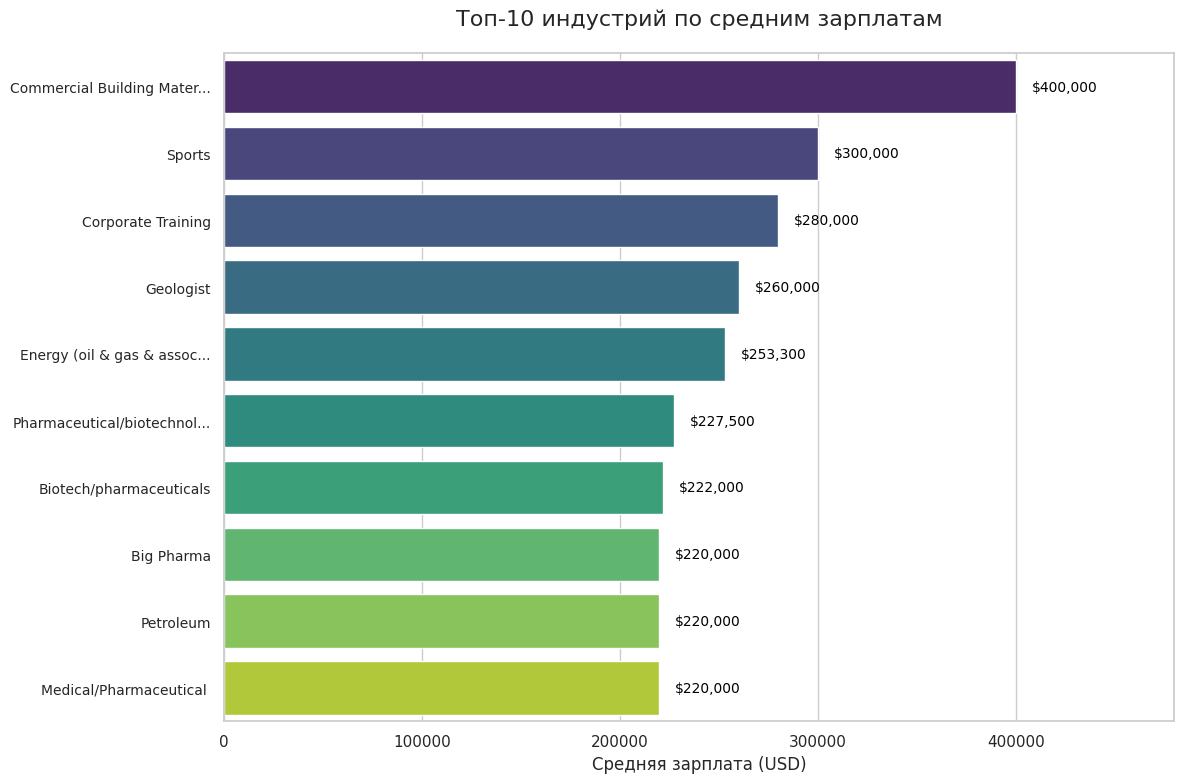

In [49]:
# Ваш код тут
industry_salary = (df.groupby('Industry')['Salary']
                   .mean()
                   .sort_values(ascending=False))

top_10_industries = industry_salary.head(10).reset_index()

plt.figure(figsize=(12, 8))

barplot = sns.barplot(
    data=top_10_industries,
    x='Salary',
    y='Industry',
    hue='Industry',
    palette="viridis",
    legend=False,
    dodge=False
)

for i, (industry, salary) in enumerate(zip(top_10_industries['Industry'], top_10_industries['Salary'])):
    formatted_salary = f"${salary:,.0f}"

    barplot.text(
        salary + 0.02 * top_10_industries['Salary'].max(),
        i,
        formatted_salary,
        va='center',
        ha='left',
        fontsize=10,
        color='black'
    )

plt.title("Топ-10 индустрий по средним зарплатам", fontsize=16, pad=20)
plt.xlabel("Средняя зарплата (USD)", fontsize=12)
plt.ylabel('')
plt.xlim(0, top_10_industries['Salary'].max() * 1.2)
plt.yticks(
    ticks=np.arange(len(top_10_industries)),
    labels=[label[:25] + '...' if len(label) > 25 else label for label in top_10_industries['Industry']],
    fontsize=10
)

plt.ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()

**2)** Влияет ли опыт работы на среднюю зарплату? (Для этого лучше всего подойдет barplot)

In [11]:
# Ваш код тут
exp_salary = (df.groupby('Work expirince all')['Salary']
              .agg(['mean', 'std', 'count'])
              .sort_values('mean', ascending=False)
              .reset_index())

plt.figure(figsize=(12, 8))
plt.subplots_adjust(bottom=0.3)

bar = sns.barplot(
    data=exp_salary,
    x='Work expirince all',
    y='mean',
    hue='Work expirince all',
    palette='viridis',
    dodge=False,
    legend=False,
    errwidth=1,
    capsize=0.2
)

for i, (_, row) in enumerate(exp_salary.iterrows()):
    plt.text(
        i,
        row['mean'] * 1.05,
        f"${row['mean']:,.0f}\n±{row['std']:,.0f}\n(n={row['count']})",
        ha='center',
        va='bottom',
        fontsize=9,
        linespacing=1.2
    )

plt.title("Влияние общего опыта работы на среднюю зарплату", fontsize=16, pad=20)
plt.xlabel("Общий опыт работы", fontsize=12)
plt.ylabel("Средняя зарплата (USD)", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylim(0, exp_salary['mean'].max() * 1.5)

sns.despine()
plt.grid(axis='y', alpha=0.3)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))

plt.show()

NameError: name 'df' is not defined

**3)** Выделяется ли в зарплате и премиях зависимость от образования? (Тут нужно построить scatter plot, при этом выбрать значения Amount of monetary compensation неравные 0)

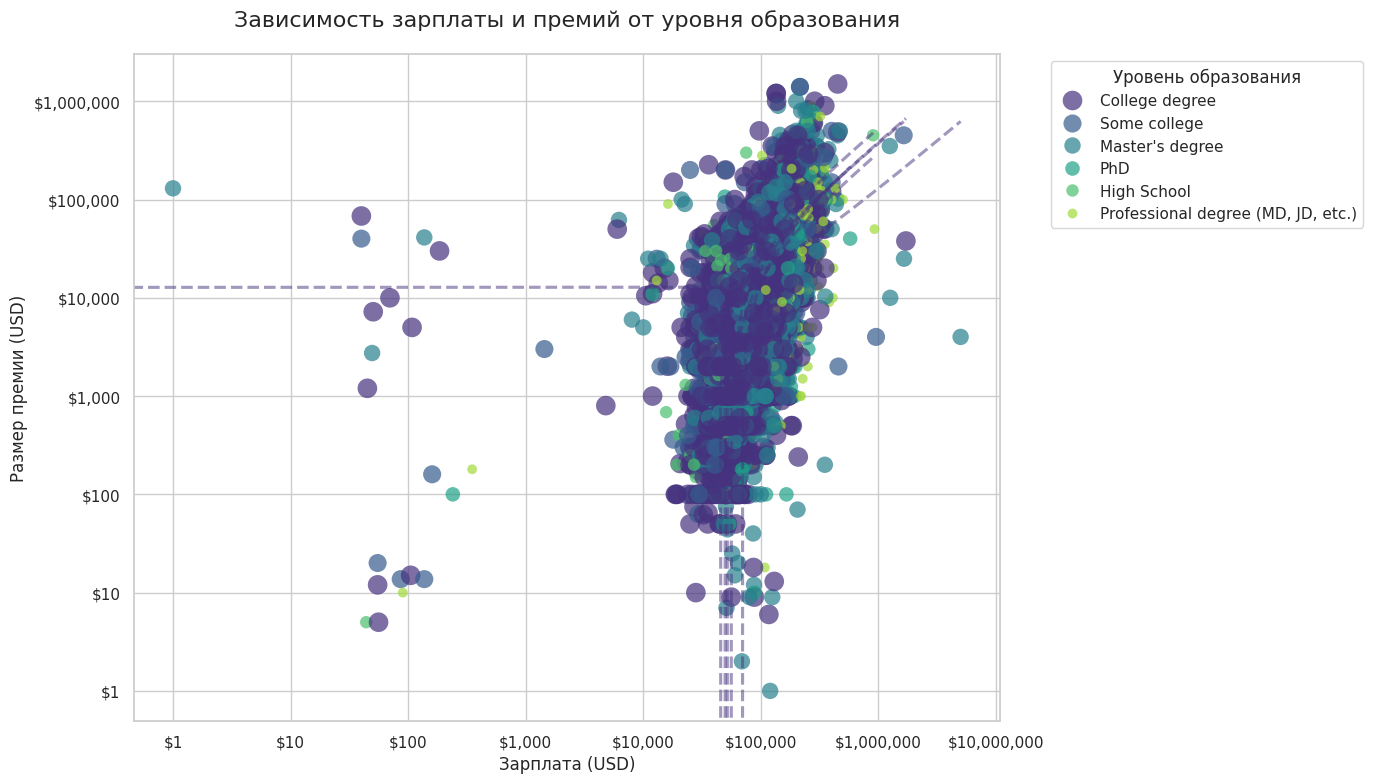

In [55]:
# Ваш код тут
df_filtered = df[df['Amount of monetary compensation'] != 0]

plt.figure(figsize=(14, 8))

scatter = sns.scatterplot(
    data=df_filtered,
    x='Salary',
    y='Amount of monetary compensation',
    hue='Education',
    palette='viridis',
    size='Education',
    sizes=(50, 200),
    alpha=0.7,
    edgecolor='none'
)

for edu_level in df_filtered['Education'].unique():
    subset = df_filtered[df_filtered['Education'] == edu_level]
    if len(subset) > 1:
        sns.regplot(
            data=subset,
            x='Salary',
            y='Amount of monetary compensation',
            scatter=False,
            ci=None,
            line_kws={'linestyle': '--', 'alpha': 0.5},
            color=scatter.get_children()[0].get_facecolor()[0]
        )

plt.title("Зависимость зарплаты и премий от уровня образования", fontsize=16, pad=20)
plt.xlabel("Зарплата (USD)", fontsize=12)
plt.ylabel("Размер премии (USD)", fontsize=12)
plt.yscale('log')
plt.xscale('log')

handles, labels = scatter.get_legend_handles_labels()
plt.legend(
    handles[:len(df_filtered['Education'].unique())],
    labels[:len(df_filtered['Education'].unique())],
    title='Уровень образования',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

# **Задание 4. Создание новых признаков (4 балла)**

Давайте теперь создадим **2 новых признака**. Мы предлагаем вам три идеи, но вы вправе придумать что то свое. Главное условие, признаки не должны повторять предыдущие и быть линейно зависимыми. например нельзя просто умножить колонку Salary на два и добавить ее к датафрейму.

Идеи которые предлагаем мы:

1.   Преобразовать колонку Race и сделать ее полезной для будующей модели. Это не совсем создание нового признака, скорее преобразование старого. Все расы в ней разделены союзом or или запятой. Вы можете создать аналог дамми переменных и разделить расы на колонки. если человек указал данную расу - ставить 1.
2.   Создать новую колонку с населением города, в котором живет человек. Для этого вы можете взять данные по пути - /content/REU-Ml-SCHOOL/city_population_data.csv.
3. Добавить колонку со cредней зарплатой человека, основанной на его возрасте и опыте работы.


In [56]:
city_population = pd.read_csv('/content/REU-Ml-SCHOOL/city_population_data.csv')

df = df.merge(city_population, on='city', how='left')

def calculate_avg_salary(age, experience):
    base_salary = 30000
    age_coef = 500
    exp_coef = 1000
    avg_salary = base_salary + (age * age_coef) + (experience * exp_coef)
    return avg_salary

df['avg_salary'] = df.apply(lambda row: calculate_avg_salary(row['Age'], row['Work expirince all']), axis=1)

df.sample(5)

KeyError: 'сity'

На этом все, если вы качественно подготовили данные, то у вас на руках датасет, который можно использоват например для обучения модели по предсказанию зарплаты или для научной работы